In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

In [2]:
#itas_data = pd.read_excel('itas_2010-2017_v6.xls')

In [64]:
itas_data = pd.read_excel('itas_2010-2017_v7.xls')

# itas_data.index = np.arange(2506)
# itas_data.to_excel('itas_2010-2017_v7.xls')

In [58]:
#itas_data.drop_duplicates(subset=['title', 'author_id_new'])

In [59]:
#index = itas_data.duplicated(subset=['title', 'author_id_new'])

In [60]:
#itas_data[index].title.values

In [61]:
#itas_data[itas_data.title == 'UAV navigation on the basis of video sequences registered by onboard camera ']

In [118]:
itas_data.head()

,title,year,author,Name,Surname,author_id_new,Gender
0,Covalent protein-RNA complexes extraction,2010,Jennifer Gerton,Jennifer,Gerton,Gerton Jennifer,Female
1,ONION: an XML format to exchange gene-related ...,2010,Dmitris Lvovs,Dmitris,Lvovs,Lvovs Dmitris,Male
2,ONION: an XML format to exchange gene-related ...,2010,Michael F. Ochs,Michael,Ochs,Ochs Michael,Male
3,ONION: an XML format to exchange gene-related ...,2010,Giovanni Parmigiani,Giovanni,Parmigiani,Parmigiani Giovanni,Male
4,ONION: an XML format to exchange gene-related ...,2010,William Speier,William,Speier,Speier William,Male


In [10]:
x = itas_data.groupby(by=['title', 'author_id_new']).count()

In [45]:
#itas_data.title.nunique()

999

In [46]:
#itas_data.author_id_new.nunique()

1069

In [19]:
#xx = list(x.index.levels)

In [22]:
#xxx = xx[1]

In [41]:
# xxxx = xx[0]
# np.unique(xxxx).shape # лист статей
# xxxx

Index([' \nИдентификация изображений документов методами,\nпредназначенными для поиска лиц ',
       ' Edge of the Expanding Protein Universe: Exploration of Sequence Space by Very Remote Homologs ',
       ' H. megidis - новый модельный организм для электрофизиологического изучения ритмических осцилляций ',
       ' Исправление стираний Х-МПП-кодами как нерегулярными МПП-кодами при декодировании по алгоритму с малой сложностью ',
       '"Зеркальные риды" в данных Hi-C ',
       '''Connected Car''-Based Customised On-Demand Tours: the Concept and Underlying Technologies ',
       'A Brief Study of Dimensionality Reduction for Mass Spectra Classification ',
       'A Generic Web Service for Running Parameter Sweep Applications ',
       'A List Decoding Approach to Woven Block Codes',
       'A Low-Complexity SCMA Detector for AWGN Channel Based on Solving Overdetermined Systems of Linear Equations. ',
       ...
       'Экспериментальное исследование распределений длин пакетов ошибок 

In [37]:
# np.unique(xxx).shape

(1069,)

In [39]:
# xxx # лист авторов

Index(['Abdah Hadeel', 'Al-Ka'bi Amin', 'Al-Mardi Mohammed',
       'Al-odhari Abdulwahab', 'Amjad R.', 'Bakin E.', 'Baraniuc Olesya',
       'Bartoli D.', 'Bartz H.', 'Belmouloud Nassim',
       ...
       'Якимов Е.', 'Якимов М.Ю.', 'Яковлева Е.Ю.', 'Ялалетдинов А.Д.',
       'Ялда Х.Г.', 'Яловая Е.А.', 'Янович Юрий', 'Яровенко Светлана',
       'Яроцкий Д.', 'Яруллин Р.С.'],
      dtype='object', name='author_id_new', length=1069)

In [28]:
# y = list(x.index.labels)

In [35]:
# np.unique(y[0]).shape # индексы статей

(999,)

In [36]:
# np.unique(y[1]).shape # индексы авторов

(1069,)

In [68]:
title_index = np.array(list(y[0]))

In [69]:
author_index = np.array(list(y[1]))

In [70]:
order = np.argsort(author_index)

In [73]:
author_index[order[-20:]]

array([1062, 1062, 1063, 1064, 1065, 1065, 1065, 1065, 1065, 1065, 1065,
       1065, 1065, 1065, 1066, 1066, 1066, 1067, 1068, 1068], dtype=int16)

In [74]:
title_index[order[-20:]]

array([440, 763, 728, 884, 243, 775, 683, 857, 572, 571, 510, 920, 377,
       627, 232, 513, 587, 659, 635, 253], dtype=int16)

In [ ]:
a1 : [t1, t2, t3]
a2 : [t1, t5, t6]
a3 : [t2, t5]
a4 :
    

t1 : []

In [78]:
y[0]

FrozenNDArray([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 23, 23, 24, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 28, 29, 29, 29, 30, 30, 30, 30, 31, 31, 32, 33, 33, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, ...], dtype='int16')

In [86]:
incidence = pd.crosstab(y[1], y[0])

In [127]:
incidence

col_0,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
row_0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
I = incidence.values

In [90]:
adj = I.dot(I.T)

In [91]:
adj.shape

(1069, 1069)

In [94]:
np.fill_diagonal(adj, 0)

In [95]:
adj.sum()

5632

In [97]:
adj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [98]:
adj.max()

27

In [101]:
np.unravel_index(adj.argmax(), adj.shape)

(167, 502)

In [102]:
xxx[167]

'Базыкин Г.А.'

In [103]:
xxx[502]

'Кондрашов А.С.'

In [107]:
itas_data[itas_data['author_id_new'] == 'Базыкин Г.А.']

,title,year,author,Name,Surname,author_id_new,Gender
14,Detecting past positive selection through ongo...,2010,G.A. Bazykin,Г.А.,Базыкин,Базыкин Г.А.,Male
15,Frequency of reversals in evolution of vertebr...,2010,G. Bazykin,Г.А.,Базыкин,Базыкин Г.А.,Male
16,Эволюция кодирующей последовательностей ДНК в ...,2010,Базыкин Г.А.,Г.А.,Базыкин,Базыкин Г.А.,Male
17,Parallel evolutionary trajectories at sites of...,2010,Georgii A. Bazykin,Г.А.,Базыкин,Базыкин Г.А.,Male
18,Edge of the Expanding Protein Universe: Explo...,2010,Georgii A. Bazykin,Г.А.,Базыкин,Базыкин Г.А.,Male
211,Анализ двунуклеотидных замен в популяции D.mel...,2011,Базыкин Г.А.,Г.А.,Базыкин,Базыкин Г.А.,Male
212,Сохранение функции без сохранения сходства пос...,2011,Базыкин Г.А.,Г.А.,Базыкин,Базыкин Г.А.,Male
213,Разность скоростей образования двойных замен в...,2011,Базыкин Г.А.,Г.А.,Базыкин,Базыкин Г.А.,Male
214,Не протяженная гетерогенность мутационного про...,2011,Базыкин Г.А.,Г.А.,Базыкин,Базыкин Г.А.,Male
215,Отбор на длину интронов в генах Drosophila mel...,2011,Базыкин Г.А.,Г.А.,Базыкин,Базыкин Г.А.,Male


In [114]:
set1 = set(itas_data[itas_data['author_id_new'] == 'Кондрашов А.С.'].title.values)

In [115]:
set2 = set(itas_data[itas_data['author_id_new'] == 'Базыкин Г.А.'].title.values)

In [117]:
len(set1.intersection(set2))

27

In [137]:
def get_coauthors(df_data, per_year=True, year=None):
    '''
    input
    
    df_data: pandas Data Frame,
             with columns: title, year, author_id_new
             
    per_year: bool,
              if True, coauthors
              will contain coathors for each year,
              if False, see "year" parameter
    year: int, 
          if "per_year" is False return coauthors for given year,
          if None, return coauthors for all years
    
    return
    
    adjacency_matrix: numpy ndarray, 
                      adjacency coauthorship matrix
    authors: authors name list (indices are the same as in adjacency matrix)
               
    Currently ignore year
    '''
    
    title_author_counts = itas_data.groupby(by=['title', 'author_id_new']).count()
    
    titles, authors = title_author_counts.index.levels
    title_index, author_index = title_author_counts.index.labels
    
    incidence_matrix = pd.crosstab(author_index, title_index).values
    adjacency_matrix = incidence_matrix.dot(incidence_matrix.T)
    np.fill_diagonal(adjacency_matrix, 0)
    
    
    return adjacency_matrix, authors

In [134]:
adj = get_coauthors(itas_data)

In [136]:
np.unravel_index(adj.argmax(), adj.shape)

(167, 502)

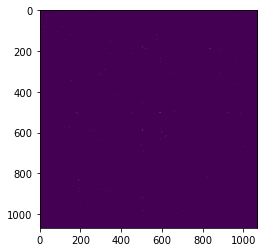

In [138]:
plt.imshow(adj)

In [162]:
g = nx.from_numpy_matrix(adj)

/home/anvar/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/anvar/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/anvar/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/anvar/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

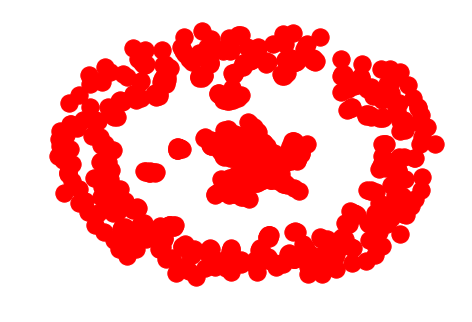

In [164]:
nx.draw_kama